# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [2]:
def myint(binario):
    if not binario.startswith('0b'):
        binario = '0b' + binario
    bits = binario[2:]  # Eliminar 0b
    if len(bits) < 16:
        bits = bits.zfill(16) #relleno con ceros  para que tenga 16 bits
    elif len(bits) > 16:
        raise ValueError("El número binario excede los 16 bits")

    valor = 0
    for i, bit in enumerate(bits):
        potencia = 15 - i
        valor += int(bit) * (2 ** potencia)

    return valor


In [29]:
numero_binario = '0b1000011100001'
resultado_myint = myint(numero_binario)
resultado_int = int(numero_binario, 2)

print(f"myint({numero_binario}) = {resultado_myint}")
print(f"int({numero_binario}, 2) = {resultado_int}")

myint(0b1000011100001) = 4321
int(0b1000011100001, 2) = 4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [30]:
import struct

def number64(binario):
    if len(binario) != 64: # Verifico que la cadena tenga 64 bits
        raise ValueError("La cadena binaria debe tener exactamente 64 bits")

    entero = int(binario, 2)
    bytes_data = entero.to_bytes(8, byteorder='big', signed=False)
    valor = struct.unpack('>d', bytes_data)[0]

    return valor

In [31]:
binario = "0100000000111011100100001111111111111111111111111111111111111111"

resultado = number64(binario)
print(resultado)

27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



## Aproximacion basica

In [41]:
import math

def aproximacion_basica(tol):
    suma = 0
    n = 0
    pi_real = math.pi
    error = float('inf')

    while error > tol:
        n += 1
        termino = (-1)**(n+1) * (1)**(2*n-1) / (2*n-1)
        suma += termino
        aproximacion = 4 * suma
        error = abs(termino)

    return 4*suma, n

In [43]:
pi_aprox, terminos = aproximacion_basica(1e-3)
print(f"Aproximación básica de π con error < {1e-3}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos necesarios: {terminos}")
print(f"Error real: {abs(pi_aprox - math.pi)}\n")

Aproximación básica de π con error < 0.001:
Valor aproximado: 3.143588659585789
Términos necesarios: 501
Error real: 0.0019960059959958087



## Mejora de la convergencia

In [45]:
def aproximacion_mejorada(tol):
    suma1 = 0
    suma2 = 0
    n1 = 0
    n2 = 0
    pi_real = math.pi
    error = float('inf')

    while error > tol:
        n1 += 1
        termino1 = (-1)**(n1+1) * (1/2)**(2*n1-1) / (2*n1-1)
        suma1 += termino1

        n2 += 1
        termino2 = (-1)**(n2+1) * (1/3)**(2*n2-1) / (2*n2-1)
        suma2 += termino2

        aproximacion = 4 * (suma1 + suma2)
        error = max(abs(termino1), abs(termino2))

    return 4 * (suma1 + suma2), n1, n2

In [40]:
pi_aprox, terminos1, terminos2 = aproximacion_mejorada(1e-3)
print(f"Aproximación mejorada de π con error < {1e-3}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos en arctan(1/2): {terminos1}")
print(f"Términos en arctan(1/3): {terminos2}")
print(f"Error real: {abs(pi_aprox - math.pi)}\n")

Aproximación mejorada de π con error < 0.001:
Valor aproximado: 3.1417411974336886
Términos en arctan(1/2): 5
Términos en arctan(1/3): 5
Error real: 0.00014854384389551



## Metodos de alta precision

In [47]:
def aproximacion_altap(tol):
    suma1 = 0
    suma2 = 0
    n1 = 0
    n2 = 0
    error = float('inf')

    while error > tol:

        n1 += 1
        termino1 = (-1)**(n1+1) * (1/5)**(2*n1-1) / (2*n1-1)
        suma1 += termino1

        if n2 == 0 or (n2 < 5 and n1 % 5 == 0) or error < tol/10:
            n2 += 1
            termino2 = (-1)**(n2+1) * (1/239)**(2*n2-1) / (2*n2-1)
            suma2 += termino2

        aproximacion = 4 * (4*suma1 - suma2)
        error = abs(aproximacion - math.pi)

    return aproximacion, n1, n2

In [49]:
pi_aprox, terminos1, terminos2 = aproximacion_altap(1e-6)
print(f"Aproximación Machin de π con error < {1e-6}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos en arctan(1/5): {terminos1}")
print(f"Términos en arctan(1/239): {terminos2}")
print(f"Error real: {abs(pi_aprox - math.pi)}")

Aproximación Machin de π con error < 1e-06:
Valor aproximado: 3.141591674516836
Términos en arctan(1/5): 4
Términos en arctan(1/239): 1
Error real: 9.79072956930338e-07


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

## serie para $$ e^{-x}$$

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def serieexponencial(x, tol=1e-7):
    term = 1.0
    total = term
    n = 0

    while True:
        n += 1
        term *= -x / n
        if abs(term) <= tol * abs(total):
            break
        total += term

    return total, n

x = 0.5
aproximacion1, N = serieexponencial(x)
exacto1 = np.exp(-x)
error1 = abs(aproximacion1 - exacto1)

print(f"Para x={x}:")
print(f"  Aproximación: {aproximacion1}")
print(f"  Valor exacto: {exacto1}")
print(f"  Error absoluto: {error1}")
print(f"  Términos usados (N): {N}")

Para x=0.5:
  Aproximación: 0.6065306648375496
  Valor exacto: 0.6065306597126334
  Error absoluto: 5.124916158116832e-09
  Términos usados (N): 9


## Terminos para x= 10

In [51]:

x = 10.0
aproximacion2, N = serieexponencial(x, tol=1e-7)
exacto2 = np.exp(-x)
error2 = abs(aproximacion2 - exacto2)

print(f"\nPara x={x}:")
print(f"  Aproximación: {aproximacion2}")
print(f"  Valor exacto: {exacto2}")
print(f"  Error relativo: {error2/exacto2}")
print(f"  Términos usados (N): {N}")

# Examinar términos alrededor de n ≈ x-1
def show_terms(x):
    term = 1.0
    total = term
    print(f"\nTérminos para x={x} alrededor de n≈{x-1}:")
    for n in range(1, 2*int(x)+1):
        term *= -x / n
        total += term
        if abs(n - (x-1)) < 5:
            print(f"n={n}: término={term}, suma acumulada={total}")

show_terms(x)


Para x=10.0:
  Aproximación: 4.539992817288513e-05
  Valor exacto: 4.5399929762484854e-05
  Error relativo: 3.501326390242681e-08
  Términos usados (N): 46

Términos para x=10.0 alrededor de n≈9.0:
n=5: término=-833.3333333333335, suma acumulada=-542.3333333333335
n=6: término=1388.8888888888891, suma acumulada=846.5555555555557
n=7: término=-1984.1269841269846, suma acumulada=-1137.571428571429
n=8: término=2480.1587301587306, suma acumulada=1342.5873015873017
n=9: término=-2755.7319223985896, suma acumulada=-1413.144620811288
n=10: término=2755.7319223985896, suma acumulada=1342.5873015873017
n=11: término=-2505.2108385441725, suma acumulada=-1162.6235369568708
n=12: término=2087.6756987868107, suma acumulada=925.0521618299399
n=13: término=-1605.9043836821622, suma acumulada=-680.8522218522223


##Analisis de precision para $$
e^{-x} = \frac{1}{e^x}
$$


In [19]:
def mejoraealamenosx(x):
    if x > 1:
        return 1 / np.exp(x)
    else:
        return serieexponencial(x)[0]

x_large = 20.0
aproximacionmejorada = mejoraealamenosx(x_large)
exacto3 = np.exp(-x_large)
errormejorado = abs(aproximacionmejorada- exacto3)

print(f"\nPara x={x_large}:")
print(f"  Método mejorado: {aproximacionmejorada}")
print(f"  Valor exacto: {exacto3}")
print(f"  Error relativo: {errormejorado/exacto3}")


Para x=20.0:
  Método mejorado: 2.061153622438558e-09
  Valor exacto: 2.061153622438558e-09
  Error relativo: 0.0


In [20]:
def precisionmayor(x_values):
    results = []
    for x in x_values:
        approx, N = serieexponencial(x)
        exact = np.exp(-x)
        error = abs(approx - exact)/exact if exact != 0 else float('inf')
        results.append((x, N, error))
    return results

# Rango de valores de x
valoresxpequeños = np.linspace(1, 10, 10)
valoresxgrandes = np.linspace(10, 100, 10)

resultados1 = precisionmayor(valoresxpequeños)
resultados2 = precisionmayor(valoresxgrandes)

print("\nResultados para x de 1 a 10:")
for x, N, error in resultados1:
    print(f"x={x:.1f}, N={N}, error relativo={error:.2e}")

print("\nResultados para x de 10 a 100:")
for x, N, error in resultados2:
    print(f"x={x:.1f}, N={N}, error relativo={error:.2e}")



Resultados para x de 1 a 10:
x=1.0, N=11, error relativo=6.28e-08
x=2.0, N=16, error relativo=2.07e-08
x=3.0, N=20, error relativo=2.52e-08
x=4.0, N=24, error relativo=2.13e-08
x=5.0, N=28, error relativo=1.55e-08
x=6.0, N=31, error relativo=5.48e-08
x=7.0, N=35, error relativo=3.36e-08
x=8.0, N=39, error relativo=2.01e-08
x=9.0, N=42, error relativo=5.86e-08
x=10.0, N=46, error relativo=3.50e-08

Resultados para x de 10 a 100:
x=10.0, N=46, error relativo=3.50e-08
x=20.0, N=81, error relativo=1.98e+00
x=30.0, N=104, error relativo=6.52e+07
x=40.0, N=122, error relativo=7.34e+16
x=50.0, N=141, error relativo=1.06e+25
x=60.0, N=156, error relativo=8.25e+34
x=70.0, N=173, error relativo=1.16e+43
x=80.0, N=188, error relativo=1.36e+52
x=90.0, N=204, error relativo=7.16e+60
x=100.0, N=220, error relativo=2.19e+69


## Grafico error vs N

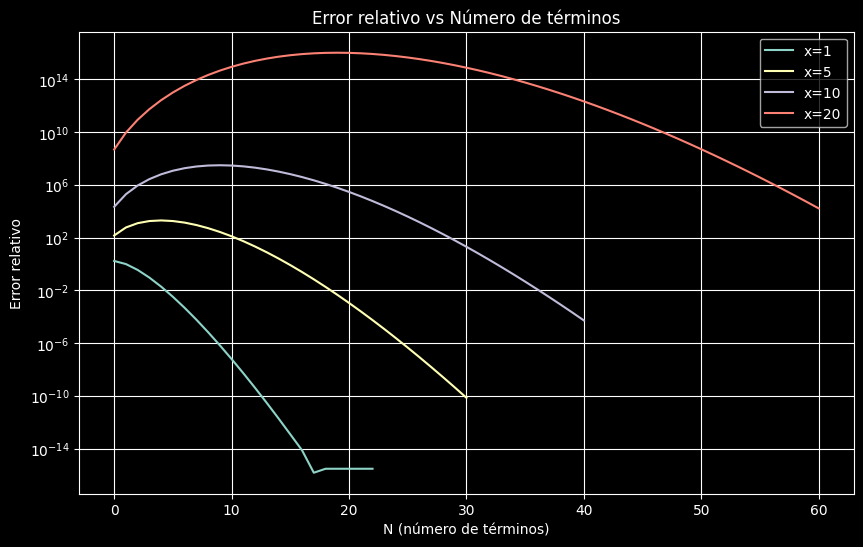

In [52]:
def figuraerrores(x_values):
    plt.figure(figsize=(10, 6))
    for x in x_values:
        errors = []
        N_values = []
        term = 1.0
        total = term
        exact = np.exp(-x)
        n = 0

        while n <= 2*x + 20:
            error = abs(total - exact)/exact if exact != 0 else float('inf')
            errors.append(error)
            N_values.append(n)

            n += 1
            term *= -x / n
            total += term

        plt.plot(N_values, errors, label=f'x={x}')
        plt.style.use('dark_background')



    plt.yscale('log')
    plt.xlabel('N (número de términos)')
    plt.ylabel('Error relativo')
    plt.title('Error relativo vs Número de términos')
    plt.legend()
    plt.grid(True)
    plt.show()

figuraerrores([1, 5, 10, 20])

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


Comparación de derivadas numéricas y exactas:
Valor exacto en x=1: f'(1) = 1

δ = 1.0e-02: Aproximación = 1.010000000000001, Error = 1.00e-02
δ = 1.0e-04: Aproximación = 1.000099999999890, Error = 1.00e-04
δ = 1.0e-06: Aproximación = 1.000000999917733, Error = 1.00e-06
δ = 1.0e-08: Aproximación = 1.000000003922529, Error = 3.92e-09
δ = 1.0e-10: Aproximación = 1.000000082840371, Error = 8.28e-08
δ = 1.0e-12: Aproximación = 1.000088900583341, Error = 8.89e-05
δ = 1.0e-14: Aproximación = 0.999200722162651, Error = 7.99e-04


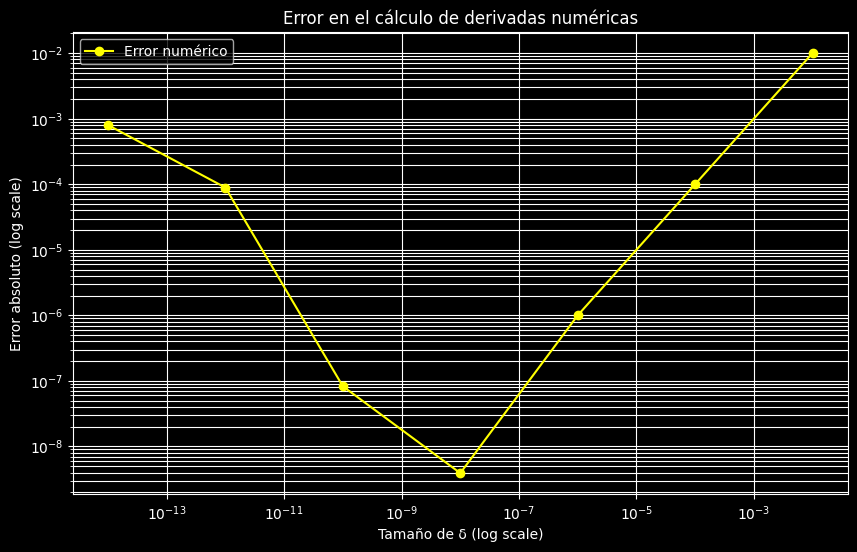

In [53]:
def f(x):
    return x * (x - 1)

def derivada(f, x, delta):
    return (f(x + delta) - f(x)) / delta
def derivadaexacta(x):
    return 2 * x - 1

puntoenx = 1
valorexacto = derivadaexacta(puntoenx)

deltas = [10**(-n) for n in range(2, 15, 2)]
resultados = []

print("Comparación de derivadas numéricas y exactas:")
print(f"Valor exacto en x={puntoenx}: f'({puntoenx}) = {valorexacto}\n")

for delta in deltas:
    aproximacion = derivada(f, puntoenx, delta)
    error = abs(aproximacion - valorexacto)
    resultados.append((delta, aproximacion, error))
    print(f"δ = {delta:.1e}: Aproximación = {aproximacion:.15f}, Error = {error:.2e}")

deltas_plot = [r[0] for r in resultados]
errors_plot = [r[2] for r in resultados]

plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.loglog(deltas_plot, errors_plot, 'o-', label='Error numérico', color = 'yellow')
plt.xlabel('Tamaño de δ (log scale)')
plt.ylabel('Error absoluto (log scale)')
plt.title('Error en el cálculo de derivadas numéricas')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()


